### Importing the libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz ##Export a decision tree in DOT format
from sklearn.model_selection import train_test_split ##Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,precision_score,recall_score

#### Few More Imports

In [14]:
import io
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.datasets import load_digits

%matplotlib inline


#### PreProcessing imports

In [15]:
from sklearn import preprocessing

In [16]:
enc = preprocessing.OneHotEncoder()
data_test = pd.read_csv('UCI_Credit_Card.csv')
tuples = (data_test.EDUCATION == 0) | (data_test.EDUCATION == 5) | (data_test.EDUCATION == 6)
data_test.loc[tuples,'EDUCATION']=4
data_category = data_test['EDUCATION']

data_category.shape
df1=pd.DataFrame(data_category)
df1.head()

,EDUCATION
0,2
1,2
2,2
3,2
4,2


In [165]:
df = pd.DataFrame(np.zeros(shape=(30000,4)),columns=['Grad_School', 'University', 'High_School','Others'])
df.head()

for i in range(100):
    if data_category[i] == 1:
        df.Grad_School[i] = 1.0
    elif data_category[i] == 2:
        df.University[i] = 1.0
    elif data_category[i] == 3:
        df.High_School[i] =1.0
    elif data_category[i] == 4:
        df.Others[i] =1.0
df.shape[0]

30000

In [164]:
df.head(5)
df1['Grad_School'] = df.Grad_School
df1['Grad_School'] = df.Grad_School
df1['Grad_School'] = df.Grad_School
df1['Grad_School'] = df.Grad_School
df1.head()


,EDUCATION,Grad_School
0,2,0.0
1,2,0.0
2,2,0.0
3,2,0.0
4,2,0.0



### Witnessing DataSet : Testing zone

In [4]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.rename(columns={'default.payment.next.month':'target'},inplace = True)
feat= ['LIMIT_BAL','EDUCATION','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','target']
dataset = data[feat[:-1]]
target =data[feat[-1]]
print(dataset.info())
target.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
LIMIT_BAL    30000 non-null float64
EDUCATION    30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
dtypes: float64(13), int64(1)
memory usage: 3.2 MB
None


(30000,)

In [5]:
dd = load_digits()
type(dd)

sklearn.utils.Bunch

In [11]:
x=np.array[1,2,3,4]
x[:-1]


TypeError: 'builtin_function_or_method' object is not subscriptable

### Cleaning Data

In [12]:
data_CC['MARRIAGE'].value_counts()

NameError: name 'data_CC' is not defined

In [13]:
data_CC['EDUCATION'].value_counts()

NameError: name 'data_CC' is not defined

## Metrics

### Confusion Matrix

In [14]:
def build_cm(Y,Y_predicted,dim,title,figNo,slot):
    #dim: number of distinct labels
    score = accuracy_score(Y,Y_predicted)
    cm=confusion_matrix(Y,Y_predicted)
    figure=plt.figure(num=figNo,figsize=(15,15))
    plt.suptitle(title,fontsize=16)
    plt.subplots_adjust(hspace=0.2, wspace=1.4)
    plt.subplot(2,2,slot)
    sb.heatmap(cm,annot=True,fmt=".2f",square =True,cmap='Reds')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    act_title = title+"| "+"Accuracy:{}".format(score)
    plt.title(act_title)

In [23]:
slot = 1

## Loading DataSet

##### Credit Card DataSet

/Users/ashishdwivedi/anaconda3/envs/ml-lib/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashishdwivedi/anaconda3/envs/ml-lib/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashishdwivedi/anaconda3/envs/ml-lib/lib/python3.5/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

CreditCard Logistic Regression F1-score:0.0
(4500, 17)


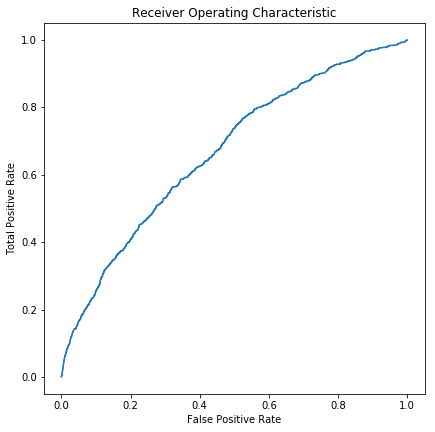

In [25]:
CreditCard()

In [24]:
def CreditCard():
    data_CC=pd.read_csv('UCI_Credit_Card.csv')
    #####----------------Cleaning the data----------------#######
    tuples = data_CC.MARRIAGE == 0
    data_CC.loc[tuples,'MARRIAGE']=3
    tuples = (data_CC.EDUCATION == 0) | (data_CC.EDUCATION == 5) | (data_CC.EDUCATION == 6)
    data_CC.loc[tuples,'EDUCATION']=4
    data_CC.rename(columns={'default.payment.next.month':'target'},inplace = True)
    feat_data_CC = ['LIMIT_BAL','EDUCATION','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','target']
    dataset=data_CC[feat_data_CC]
    ###############################################################
    
    ################---------- One Hot Encoding --------------################
    df = pd.DataFrame(np.zeros(shape=(30000,4)),columns=['Grad_School', 'University', 'High_School','Others'])
    for i in range(df.shape[0]):
        if dataset.EDUCATION[i] == 1:
            df.Grad_School[i] = 1.0
        elif dataset.EDUCATION[i] == 2:
            df.University[i] = 1.0
        elif dataset.EDUCATION[i] == 3:
            df.High_School[i] =1.0
        elif dataset.EDUCATION[i] == 4:
            df.Others[i] =1.0
    
    dataset['Grad_School'] =df.Grad_School
    dataset['University'] = df.University
    dataset['High_School'] = df.High_School
    dataset['Edu_Others'] = df.Others
    
    target = dataset['target']
    target = pd.DataFrame(target)
    #print(type(dataset))
    dataset.drop(['EDUCATION','target'],axis=1,inplace=True)
    #print(dataset.columns)
    #print(dataset.head(1))
    #print(target.head(2))
    ################--------One Hot Encoding End -------------#################
    
    
    
    ##------------------ train_test_split------------------##
    
    X_train,X_test,Y_train,Y_test = train_test_split(dataset,target,test_size=0.15,random_state = 20, shuffle=True)
#     X_train = train[feat_data_CC[:-1]]
#     Y_train = train[feat_data_CC[-1]]

#     X_test = test[feat_data_CC[:-1]]
#     Y_test = test[feat_data_CC[-1]]
    ################################################################
    
      ################--------Normalize------------------#############
    scaler =preprocessing.StandardScaler()
    scaler.fit(X_train)
    scaler.transform(X_train)
    scaler.transform(X_test)
    
    ##############------ End Normalize----################
    #-------------different classification techniques ----------------
    #figNo = 1
    #decisionTree(X_train,X_test,Y_train,Y_test,True,2,'CreditCard',1,1)
    logistic_Regression(X_train,X_test,Y_train,Y_test,True,2,'CreditCard',2,2)
    #build_SVM(X_train,X_test,Y_train,Y_test,True,2,'CreditCard',3,3)
    #kNN(X_train,X_test,Y_train,Y_test,True,2,'CreditCard',4,4)
    

In [16]:
data = pd.read_csv('UCI_Credit_Card.csv') ## this shows no need to convert to dat
data.head(5)
data_mnist = load_digits()
type(data_mnist)

sklearn.utils.Bunch

#### MNIST DATASET

In [6]:
def MNIST():
    digit_data = load_digits()
    X_train,X_test,Y_train,Y_test = train_test_split(digit_data.data,digit_data.target,test_size=0.15,random_state=20,shuffle=True)
    
    ## normalization is not required though a normalized data below
    ####------------ Normalization-------####
    ###### StandardScaler : Standardize by removing mean and scaling to unit variance
    scaler =preprocessing.StandardScaler()
    scaler.fit(X_train)
    scaler.transform(X_train)
    scaler.transform(X_test)
    
    ############
    
    figNo = 2
    ###------------- Calling Classifiers---------###
    decisionTree(X_train,X_test,Y_train,Y_test,False,10,'MNIST',5,1)
    #logistic_Regression(X_train,X_test,Y_train,Y_test,False,10,'MNIST',6,2)
    #build_SVM(X_train,X_test,Y_train,Y_test,False,10,'MNIST',7,3)
    #kNN(X_train,X_test,Y_train,Y_test,False,10,'MNIST',8,4)

## Classifiers

### Building Decision Tree Model

In [19]:
def decisionTree(X_train,X_test,Y_train,Y_test,CC,dim,title,figNo,slot):
    dt_classifier = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=150,random_state=10)
    dt_model = dt_classifier.fit(X_train,Y_train)
    
    Y_test_pred = dt_model.predict(X_test)
    
    Y_train_pred = dt_model.predict(X_train)
    print(dt_model.get_params())
    if CC: ## F1 score
        print(title+' Decision Tree '+'F1-score:{}'.format(f1_score(Y_test,Y_test_pred)))
        print(title+' Decision Tree '+'precision-score:{}'.format(precision_score(Y_test,Y_test_pred,)))
        print(title+' Decision Tree '+'F1-score:{}'.format(recall_score(Y_test,Y_test_pred)))


    ############---------------------- ROC CURVE-------------------###############
        #print(X_test.shape)
        y_score = dt_model.predict_proba(X_test)
        #print(y_score[:,0])
        #print (type(y_score),y_score.shape,type(Y_test),Y_test.shape)
        fpr,tpr,threshold = roc_curve(Y_test,y_score[:,1],pos_label=1)
        
        #####----Plotting ROC curve----####
        plt.figure(num=figNo,figsize=(15,15))
        plt.subplot(2,2,1)
        plt.plot(fpr,tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('Total Positive Rate')
        plt.title('Receiver Operating Characteristic')
        
        #####----Plotting ROC done-----#####
    ####################---------------- ROC END --------##############################

    ############---------------------- TOP N Accuracy  ---------------###############
    if CC ==False:
        count=0
        total_example_test = Y_test.shape[0]
        y_score = dt_model.predict_proba(X_test)
        #print(y_score[1:3,:])
        #print(type(y_score))
        sorted_index_top = np.argsort(y_score) # top 3 classes as per probability #reversing the sorted_index
        print(Y_test_pred.shape,X_test.shape,Y_test.shape)
        ## Pulling top 3 predictions
        top_3 = sorted_index_top[:,7:10]
        #print(type(top_3))
        #X_test.shape[0]
        for i in range(Y_test.shape[0]):
#             print("Y_test_pred",Y_test_pred[i])
#             print("top 3",top_3[i,:])
#             print('Y_test',Y_test[i])
#             print('------------------------------')
            if (Y_test[i] in top_3[i,:]) == True:
#                 print("Y_test_pred",Y_test_pred[i])
#                 print("top 3",top_3[i,0:4])
#                 print('Y_test',Y_test[i])
#                 print('Bool',Y_test_pred[i] in top_3[i,0:4])
                count =count + 1
#                 print('count',count)
#                 print('------------------------------')

#             else:
#                 print('Bool',Y_test_pred[i] in top_3[i,:])
#                 print('Sorted Index Descedning in value')
#                 print(sorted_index_top[i,:],top_3[i,:])
#                 print(y_score[i,:])
#                 print('Y_test_pred',Y_test_pred[i],'Y_true_test',Y_test[i])
#                 print('Check th output')
#                 print(np.argsort(y_score[i,:]))
#                 print(np.argsort(y_score[i,:])[::-1])
#                 print('------------------------------')
                
        print('Top 3 accuracy {}'.format(count/total_example_test))
        print('Top 1 accuracy{}'.format(accuracy_score(Y_test,Y_test_pred)))
    
    ############---------------------- TOP N Accuracy End -------------------###############


    
    ##########------ConfusionMatrix----------###############
    #build_cm(Y_test,Y_test_pred,dim,title +'|test',figNo,2)
    #build_cm(Y_train,Y_train_pred,dim,title +'|train',figNo,4)
    

In [22]:
#do it later
#def wanna_see_DT(model,feature,filename):

test = np.array([[1, 2,7], [3, 4,8], [5, 6,9]])
test[:,0:2]

array([[1, 2],
       [3, 4],
       [5, 6]])

## Logistic Regression

In [23]:
def logistic_Regression(X_train,X_test,Y_train,Y_test,CC,dim,title,figNo,slot):
    log_Reg = LogisticRegression()
    log_model = log_Reg.fit(X_train,Y_train)
    
    Y_test_pred =log_model.predict(X_test)
    
    Y_train_pred = log_model.predict(X_train)
    
    if CC:
        print(title+' Logistic Regression '+'F1-score:{}'.format(f1_score(Y_test,Y_test_pred)))
    ############---------------------- ROC CURVE-------------------###############
        print(X_test.shape)
        y_score = log_model.predict_proba(X_test)
        #print(y_score[1:3,0:2])
        #print (type(y_score),y_score.shape,type(Y_test),Y_test.shape)
        fpr,tpr,threshold = roc_curve(Y_test,y_score[:,1],pos_label=1)
        
        #####----Plotting ROC curve----####
        plt.figure(num=figNo,figsize=(15,15))
        plt.subplot(2,2,1)
        plt.plot(fpr,tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('Total Positive Rate')
        plt.title('Receiver Operating Characteristic')
        
    ##############----Plotting ROC done--------------------------------#################
    ############---------------------- TOP N Accuracy  ---------------###############
    if CC ==False:
        count=0
        total_example_test = Y_test.shape[0]
        y_score = log_model.predict_proba(X_test)
        #print(y_score[1:3,:])
        #print(type(y_score))
        sorted_index_top = np.argsort(y_score) # top 3 classes as per probability #reversing the sorted_index
        print(Y_test_pred.shape,X_test.shape,Y_test.shape)
        ## Pulling top 3 predictions
        top_3 = sorted_index_top[:,7:10]
        #print(type(top_3))
        #X_test.shape[0]
        for i in range(Y_test.shape[0]):
            if (Y_test[i] in top_3[i,:]) == True:
                count =count + 1
        print('Top 3 accuracy {}'.format(count/total_example_test))
        print('Top 1 accuracy{}'.format(accuracy_score(Y_test,Y_test_pred)))
    
    ############---------------------- TOP N Accuracy End -------------------###############


    ##############------ConfusionMatrix-------------#################
    #build_cm(Y_test,Y_test_pred,dim,title+'|test',figNo,2)
    #build_cm(Y_train,Y_train_pred,dim,title+'|train',figNo,4)

### SVM Implementation

In [9]:
def build_SVM(X_train,X_test,Y_train,Y_test,CC,dim,title,figNo,slot):
    svm_classifier = SVC(kernel='linear')
    svm_model = svm_classifier.fit(X_train,Y_train)
    
    Y_test_pred =svm_model.predict(X_test)
    
    Y_train_pred = svm_model.predict(X_train)
    if CC:
        print(title+' SVM '+'F1-score:{}'.format(f1_score(Y_test,Y_test_pred)))
        ############---------------------- ROC CURVE-------------------###############
        print(X_test.shape)
        y_score = svm_model.predict_proba(X_test)
        print(y_score[:,0])
        #print (type(y_score),y_score.shape,type(Y_test),Y_test.shape)
        fpr,tpr,threshold = roc_curve(Y_test,y_score[:,1],pos_label=1)
        
        #####----Plotting ROC curve----####
        plt.figure(num=figNo,figsize=(15,15))
        plt.subplot(2,2,1)
        plt.plot(fpr,tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('Total Positive Rate')
        plt.title('Receiver Operating Characteristic')
        
        #####----Plotting ROC done-----#####
    ############---------------------- TOP N Accuracy  ---------------###############
    if CC ==False:
        count=0
        total_example_test = Y_test.shape[0]
        y_score = dt_model.predict_proba(X_test)
        #print(y_score[1:3,:])
        #print(type(y_score))
        sorted_index_top = np.argsort(y_score) # top 3 classes as per probability #reversing the sorted_index
        print(Y_test_pred.shape,X_test.shape,Y_test.shape)
        ## Pulling top 3 predictions
        top_3 = sorted_index_top[:,7:10]
        #print(type(top_3))
        #X_test.shape[0]
        for i in range(Y_test.shape[0]):
            if (Y_test[i] in top_3[i,:]) == True:
                count =count + 1
        print('Top 3 accuracy {}'.format(count/total_example_test))
        print('Top 1 accuracy{}'.format(accuracy_score(Y_test,Y_test_pred)))
    
    ############---------------------- TOP N Accuracy End -------------------###############


    
    ####------------Confusion Matrix----#####
    build_cm(Y_test,Y_test_pred,dim,title+'|test',figNo,2)
    build_cm(Y_train,Y_train_pred,dim,title+'|train',figNo,4)
    
    

#### KNN Implementation

In [10]:
def kNN(X_train,X_test,Y_train,Y_test,CC,dim,title,figNo,slot):
    knn_clf = KNeighborsClassifier()
    knn_model = knn_clf.fit(X_train,Y_train)
    
    Y_test_pred =knn_model.predict(X_test)    
    Y_train_pred = knn_model.predict(X_train)
    if CC:
        print(title+' KNN '+'F1-score:{}'.format(f1_score(Y_test,Y_test_pred)))
        ############---------------------- ROC CURVE-------------------###############
        print(X_test.shape)
        y_score = knn_model.predict_proba(X_test)
        #print(y_score[1:3,0:2])
        #print (type(y_score),y_score.shape,type(Y_test),Y_test.shape)
        fpr,tpr,threshold = roc_curve(Y_test,y_score[:,1],pos_label=1)
        
        #####----Plotting ROC curve----####
        plt.figure(num=figNo,figsize=(15,15))
        plt.subplot(2,2,1)
        plt.plot(fpr,tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('Total Positive Rate')
        plt.title('Receiver Operating Characteristic')
        
        #####----Plotting ROC done-----#####
    ############---------------------- TOP N Accuracy  ---------------###############
    if CC ==False:
        count=0
        total_example_test = Y_test.shape[0]
        y_score = knn_model.predict_proba(X_test)
        #print(y_score[1:3,:])
        #print(type(y_score))
        sorted_index_top = np.argsort(y_score) # top 3 classes as per probability #reversing the sorted_index
        print(Y_test_pred.shape,X_test.shape,Y_test.shape)
        ## Pulling top 3 predictions
        top_3 = sorted_index_top[:,7:10]
        #print(type(top_3))
        #X_test.shape[0]
        for i in range(Y_test.shape[0]):
            if (Y_test[i] in top_3[i,:]) == True:
                count =count + 1
        print('Top 3 accuracy {}'.format(count/total_example_test))
        print('Top 1 accuracy{}'.format(accuracy_score(Y_test,Y_test_pred)))
    
    ############---------------------- TOP N Accuracy End -------------------###############



    
    ####--------ConfusionMatrix---####
    build_cm(Y_test,Y_test_pred,dim,title+'|test',figNo,2)
    build_cm(Y_train,Y_train_pred,dim,title+'|train',figNo,4)

## Main Function

/Users/ashishdwivedi/anaconda3/envs/ml-lib/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashishdwivedi/anaconda3/envs/ml-lib/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashishdwivedi/anaconda3/envs/ml-lib/lib/python3.5/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

   LIMIT_BAL  EDUCATION  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0    20000.0          2     3913.0     3102.0      689.0        0.0   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0        0.0        0.0       0.0     689.0       0.0       0.0       0.0   

   PAY_AMT6  target  Grad_School  University  High_School  Edu_Others  
0       0.0       1          0.0         1.0          0.0         0.0  
   target
0       1
1       1
{'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_weight_fraction_leaf': 0.0, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'presort': False, 'class_weight': None, 'splitter': 'best', 'max_depth': None, 'random_state': 10, 'min_samples_split': 150, 'criterion': 'gini'}
CreditCard Decision Tree F1-score:1.0
(4500, 19)
[1. 1. 1. ... 1. 1. 1.]


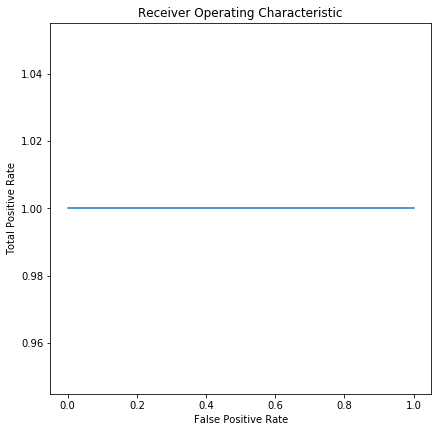

In [177]:
if __name__== "__main__":
    CreditCard()

In [236]:
n = np.array(['4','1','.7','5'])
x=np.argsort(n)

In [286]:
val=np.array(['100'])

In [288]:
y=np.multiply(n,val)

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U3') dtype('<U3') dtype('<U3')

In [255]:
3 in x[0:2]
#x[0:1]

False

In [59]:
z=np.ndarray(shape=(4,4), dtype=float, order='F')


In [216]:
x

('1', '2')

In [60]:
z

array([[-2.31584178e+077,  2.24650069e-314,  2.25005052e-314,
         2.24769677e-314],
       [ 1.29073923e-231,  2.24650069e-314,  2.24748603e-314,
         2.24684280e-314],
       [ 2.25740513e-314,  2.25476847e-314,  0.00000000e+000,
         0.00000000e+000],
       [ 2.24678658e-314,  2.24687457e-314,  0.00000000e+000,
         1.11253919e-308]])

In [61]:
z[::-1]

array([[ 2.24678658e-314,  2.24687457e-314,  0.00000000e+000,
         1.11253919e-308],
       [ 2.25740513e-314,  2.25476847e-314,  0.00000000e+000,
         0.00000000e+000],
       [ 1.29073923e-231,  2.24650069e-314,  2.24748603e-314,
         2.24684280e-314],
       [-2.31584178e+077,  2.24650069e-314,  2.25005052e-314,
         2.24769677e-314]])

In [212]:
type(x)

tuple

'1'